# **Visualización de las series temporales de datos**
* El CSV con el que se realizan las gráficas es el de la Turbina Eólica 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Procesamiento de datos ###
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from pandas.plotting import scatter_matrix

### Visualización ###
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

<ipython-input-2-f496ed623a93>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')


In [ ]:
# Especifica la ruta del archivo CSV
file_path = '/content/drive/MyDrive/Universidad/TFG/Material/Scripts Jorge Colab/Scrips Visualization Colab/Anemoi_WT1.csv'

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path, parse_dates=True)
df.pop("Unnamed: 0")
df

,Id,TTimeStamp,Amb_WindSpeed_Avg,Grd_Prod_Pwr_Avg,Blds_PitchAngle_Avg,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min
0,1,2009-07-08 15:20:00,0.4,-1.5,54.4,0.0,-2.1
1,1,2009-07-08 15:30:00,0.4,-2.8,90.0,-2.0,-3.8
2,1,2009-07-08 15:40:00,0.4,-2.0,90.0,-2.0,-2.1
3,1,2009-07-08 15:50:00,0.4,-2.0,90.0,-2.0,-2.1
4,1,2009-07-08 16:00:00,0.4,-2.0,90.0,-2.0,-2.1
...,...,...,...,...,...,...,...
399010,1,2017-03-10 14:20:00,5.1,205.2,-1.1,669.3,-17.3
399011,1,2017-03-10 14:30:00,4.9,180.8,-0.9,419.0,-16.8
399012,1,2017-03-10 14:40:00,4.4,101.7,-0.2,288.7,-28.1
399013,1,2017-03-10 14:50:00,5.4,265.7,-1.2,644.3,-21.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399015 entries, 0 to 399014
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   399015 non-null  int64  
 1   TTimeStamp           399015 non-null  object 
 2   Amb_WindSpeed_Avg    398988 non-null  float64
 3   Grd_Prod_Pwr_Avg     399003 non-null  float64
 4   Blds_PitchAngle_Avg  399004 non-null  float64
 5   Grd_Prod_Pwr_Max     399003 non-null  float64
 6   Grd_Prod_Pwr_Min     399003 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 21.3+ MB


## **Gráficas de Visualización de las variables Speed, Avg_Power, PitchAngle**

### **VELOCIDAD DEL VIENTO**

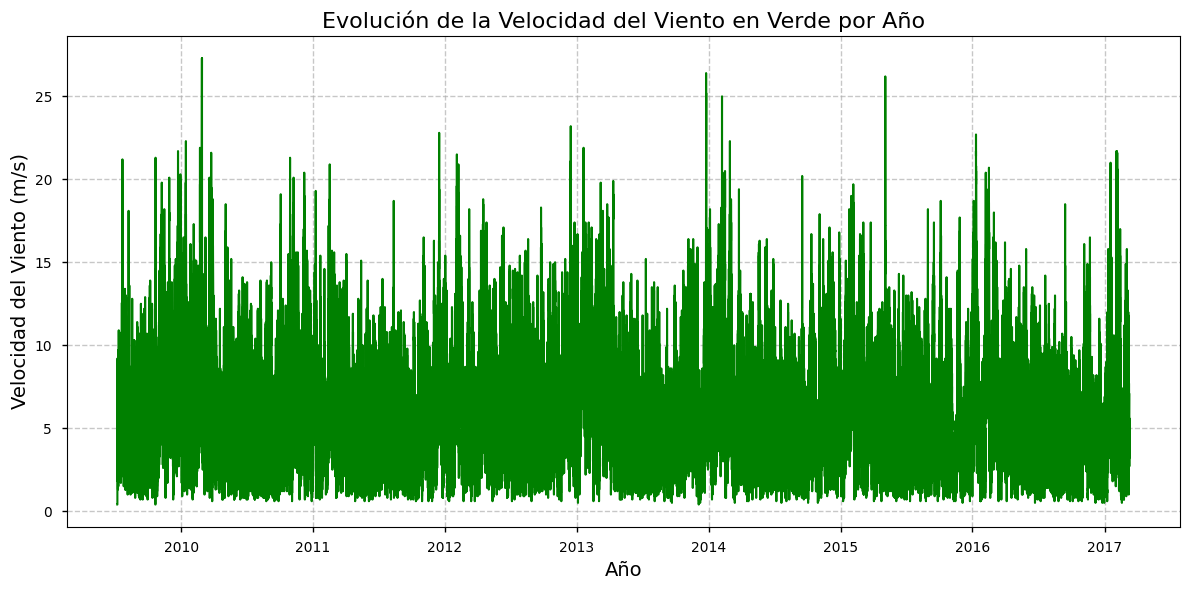

In [ ]:
# ================================================================
# Gráfica Viento desde 2009 - 2017
# ================================================================
# 'TTimeStamp' sea del tipo datetime
df['TTimeStamp'] = pd.to_datetime(df['TTimeStamp'])

df['año'] = df['TTimeStamp'].dt.year

plt.figure(figsize=(12, 6))
plt.plot(df['TTimeStamp'], df["Amb_WindSpeed_Avg"], color='green', linewidth=1.5)

plt.xlabel('Año', fontsize = 14)
plt.ylabel('Velocidad del Viento (m/s)', fontsize = 14)
plt.title('Evolución de la Velocidad del Viento en Verde por Año', fontsize = 16)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('TotalWindSpeedAvg.pdf',bbox_inches = 'tight')

plt.show()

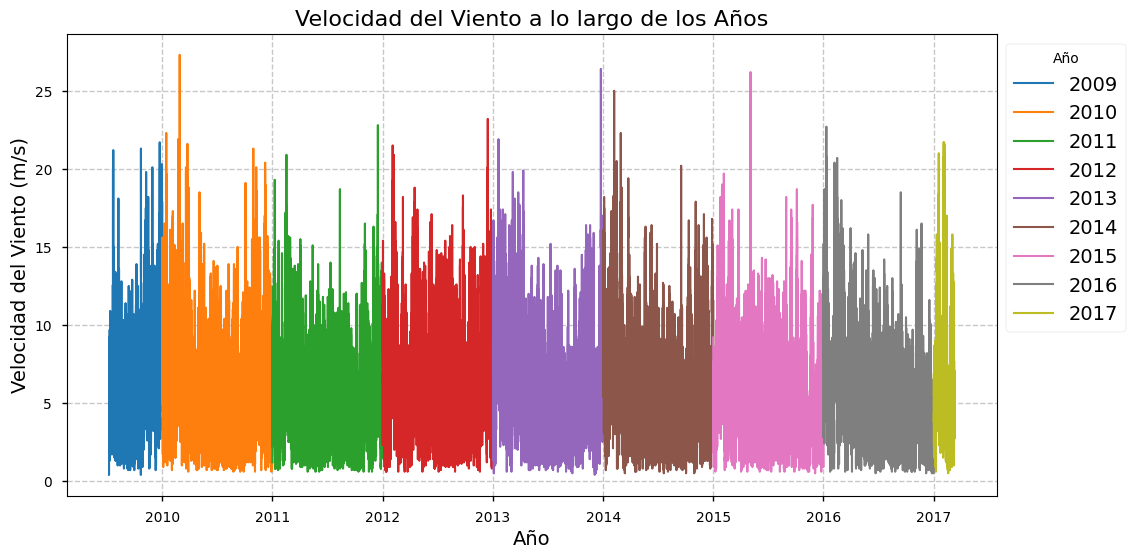

In [ ]:
# ================================================================
# =============== Gráfica Viento En cada año ===============
# ================================================================

df['TTimeStamp'] = pd.to_datetime(df['TTimeStamp'])
df['año'] = df['TTimeStamp'].dt.year

plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura según tus preferencias

for año, datos_año in df.groupby('año'):
    plt.plot(datos_año['TTimeStamp'], datos_año['Amb_WindSpeed_Avg'], label=str(año))

# Personalizacion
plt.xlabel('Año', fontsize = 14)
plt.ylabel('Velocidad del Viento (m/s)', fontsize = 14)
plt.title('Velocidad del Viento a lo largo de los Años', fontsize = 16)
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14)  # Mostrar leyenda fuera del gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('AnualWindSpeedAvg.pdf',bbox_inches = 'tight')

# Mostrar
plt.show()

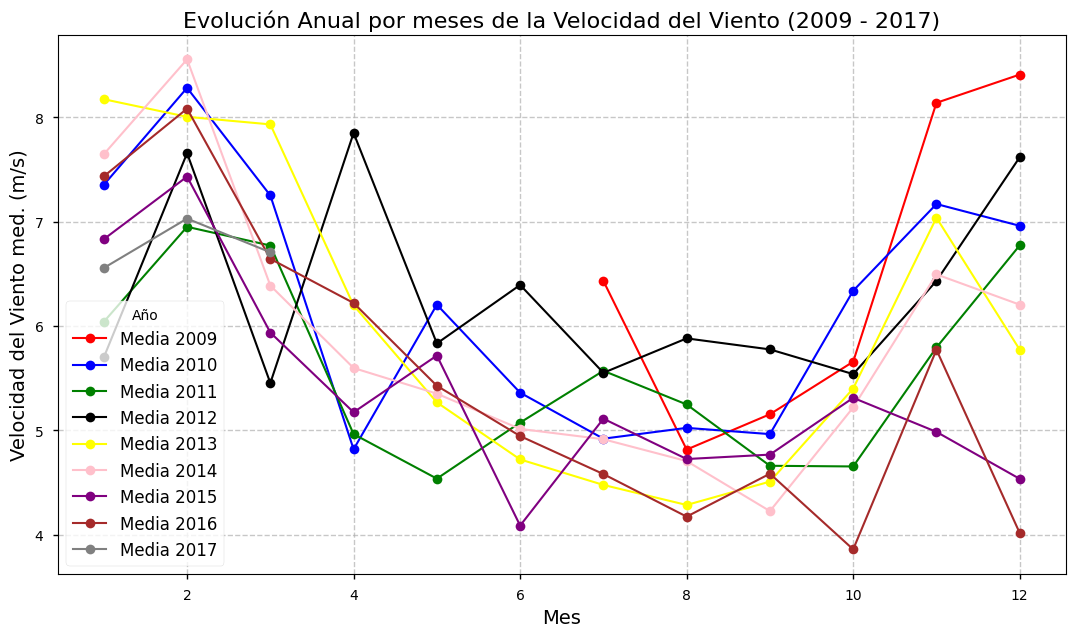

In [ ]:
# ================================================================
# =============== Gráfica Viento Media Durante los meses =========
# ================================================================

df['mes'] = df['TTimeStamp'].dt.month

# la media mensual para cada año
medias_2009 = df[df['año'] == 2009].groupby('mes')['Amb_WindSpeed_Avg'].mean()
medias_2010 = df[df['año'] == 2010].groupby('mes')['Amb_WindSpeed_Avg'].mean()
medias_2011 = df[df['año'] == 2011].groupby('mes')['Amb_WindSpeed_Avg'].mean()
medias_2012 = df[df['año'] == 2012].groupby('mes')['Amb_WindSpeed_Avg'].mean()
medias_2013 = df[df['año'] == 2013].groupby('mes')['Amb_WindSpeed_Avg'].mean()
medias_2014 = df[df['año'] == 2014].groupby('mes')['Amb_WindSpeed_Avg'].mean()
medias_2015 = df[df['año'] == 2015].groupby('mes')['Amb_WindSpeed_Avg'].mean()
medias_2016 = df[df['año'] == 2016].groupby('mes')['Amb_WindSpeed_Avg'].mean()
medias_2017 = df[df['año'] == 2017].groupby('mes')['Amb_WindSpeed_Avg'].mean()


# Gráfico
plt.figure(figsize=(13, 7))

plt.plot(medias_2009.index, medias_2009, label='Media 2009', color='red', marker='o')
plt.plot(medias_2010.index, medias_2010, label='Media 2010', color='blue', marker='o')
plt.plot(medias_2011.index, medias_2011, label='Media 2011', color='green', marker='o')
plt.plot(medias_2012.index, medias_2012, label='Media 2012', color='black', marker='o')
plt.plot(medias_2013.index, medias_2013, label='Media 2013', color='yellow', marker='o')
plt.plot(medias_2014.index, medias_2014, label='Media 2014', color='pink', marker='o')
plt.plot(medias_2015.index, medias_2015, label='Media 2015', color='purple', marker='o')
plt.plot(medias_2016.index, medias_2016, label='Media 2016', color='brown', marker='o')
plt.plot(medias_2017.index, medias_2017, label='Media 2017', color='gray', marker='o')

# Personalizacion
plt.xlabel('Mes', fontsize = 14)
plt.ylabel('Velocidad del Viento med. (m/s)', fontsize = 14)
plt.title('Evolución Anual por meses de la Velocidad del Viento (2009 - 2017)', fontsize = 16)
plt.legend(title='Año', fontsize = 12)
plt.grid(True, linestyle='--', alpha=0.7)
# plt.grid(False)
# Mostrar
plt.savefig('MonthsAvgWindSpeedAvg.pdf',bbox_inches = 'tight')
plt.show()

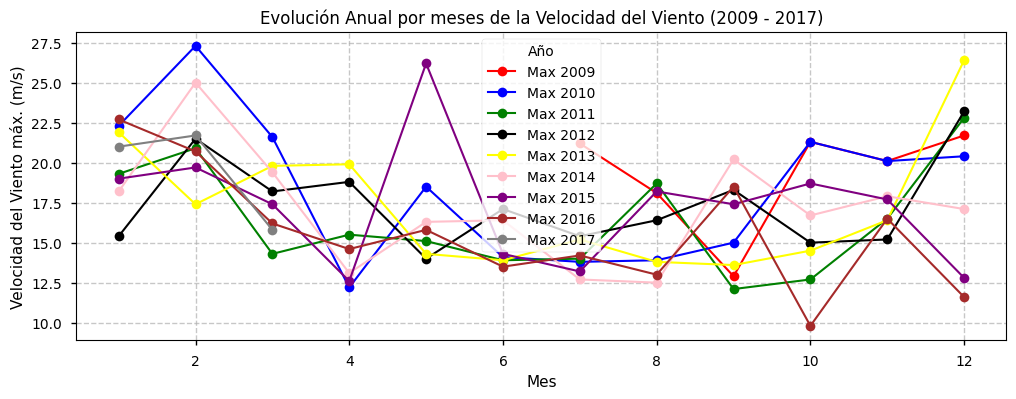

In [ ]:
# ================================================================
# =============== Gráfica Viento MAX Durante los meses ===========
# ================================================================

df['mes'] = df['TTimeStamp'].dt.month

# la media mensual para cada año
max_2009 = df[df['año'] == 2009].groupby('mes')['Amb_WindSpeed_Avg'].max()
max_2010 = df[df['año'] == 2010].groupby('mes')['Amb_WindSpeed_Avg'].max()
max_2011 = df[df['año'] == 2011].groupby('mes')['Amb_WindSpeed_Avg'].max()
max_2012 = df[df['año'] == 2012].groupby('mes')['Amb_WindSpeed_Avg'].max()
max_2013 = df[df['año'] == 2013].groupby('mes')['Amb_WindSpeed_Avg'].max()
max_2014 = df[df['año'] == 2014].groupby('mes')['Amb_WindSpeed_Avg'].max()
max_2015 = df[df['año'] == 2015].groupby('mes')['Amb_WindSpeed_Avg'].max()
max_2016 = df[df['año'] == 2016].groupby('mes')['Amb_WindSpeed_Avg'].max()
max_2017 = df[df['año'] == 2017].groupby('mes')['Amb_WindSpeed_Avg'].max()


# Gráfico
plt.figure(figsize=(12, 4))

plt.plot(max_2009.index, max_2009, label='Max 2009', color='red', marker='o')
plt.plot(max_2010.index, max_2010, label='Max 2010', color='blue', marker='o')
plt.plot(max_2011.index, max_2011, label='Max 2011', color='green', marker='o')
plt.plot(max_2012.index, max_2012, label='Max 2012', color='black', marker='o')
plt.plot(max_2013.index, max_2013, label='Max 2013', color='yellow', marker='o')
plt.plot(max_2014.index, max_2014, label='Max 2014', color='pink', marker='o')
plt.plot(max_2015.index, max_2015, label='Max 2015', color='purple', marker='o')
plt.plot(max_2016.index, max_2016, label='Max 2016', color='brown', marker='o')
plt.plot(max_2017.index, max_2017, label='Max 2017', color='gray', marker='o')

# Personalizacion
plt.xlabel('Mes')
plt.ylabel('Velocidad del Viento máx. (m/s)')
plt.title('Evolución Anual por meses de la Velocidad del Viento (2009 - 2017)')
plt.legend(title='Año')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('MonthsMaxWindSpeedAvg.pdf',bbox_inches = 'tight')

# Mostrar
plt.show()

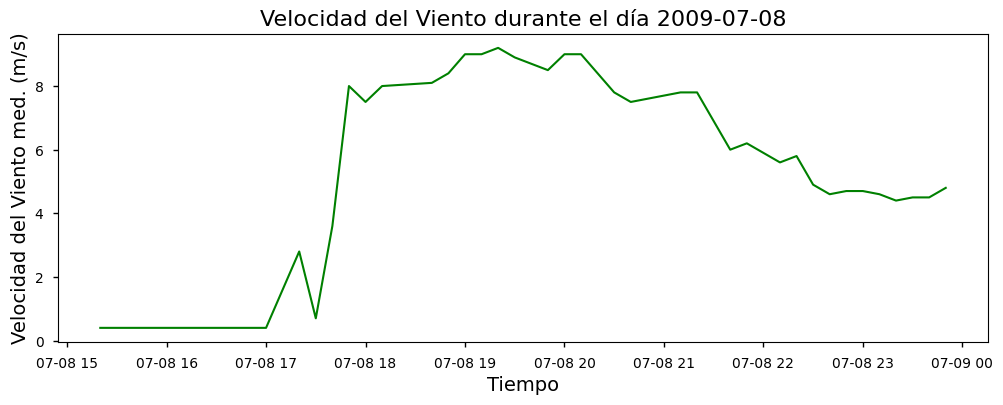

In [ ]:
# ================================================================
# =============== Gráfica Viento en un día =======================
# ================================================================

# un solo día: el primer día del dataset
fecha_deseada = df['TTimeStamp'].dt.date.iloc[0]
datos_dia = df[df['TTimeStamp'].dt.date == fecha_deseada]

plt.figure(figsize=(12, 4))

colores = datos_dia['Amb_WindSpeed_Avg']
plt.plot(datos_dia['TTimeStamp'], datos_dia['Amb_WindSpeed_Avg'], linestyle='-', color='green')  # Set the color to green
plt.rcParams['axes.edgecolor'] = 'black'  # Color de borde negro

plt.xlabel('Tiempo', fontsize = 14)
plt.ylabel('Velocidad del Viento med. (m/s)', fontsize = 14)
plt.title(f'Velocidad del Viento durante el día {fecha_deseada}', fontsize = 16)
plt.savefig('DayWindSpeedAvg.pdf',bbox_inches = 'tight')
plt.show()

### **ÁNGULO DE PITCH**

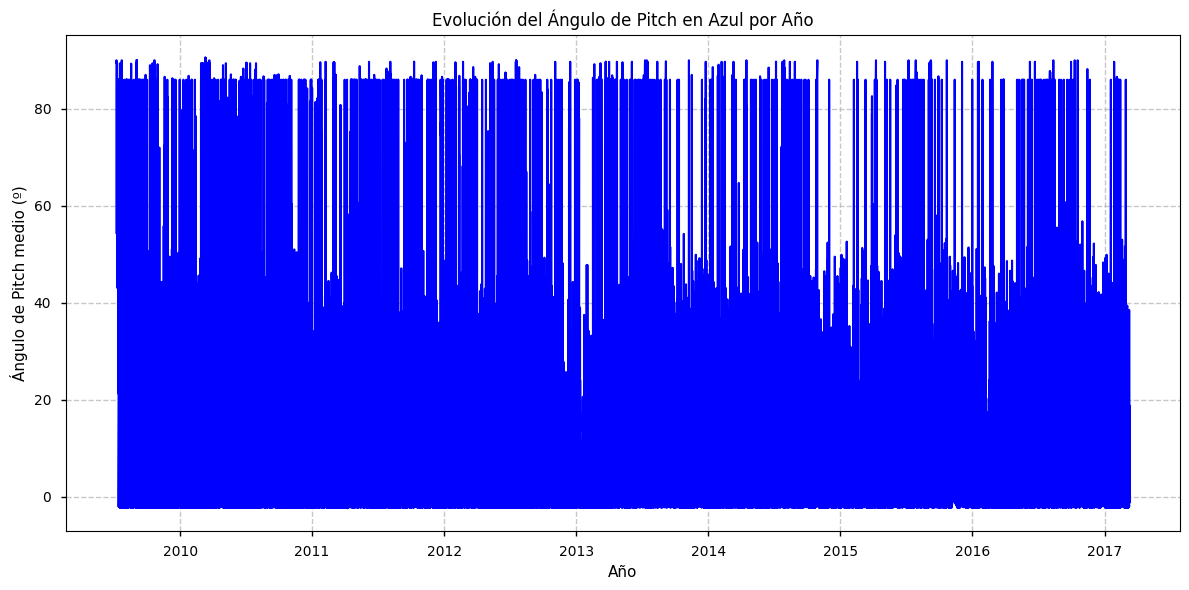

In [ ]:
# ================================================================
# Gráfica Ángulo de Pitch desde 2009 - 2017
# ================================================================
df['TTimeStamp'] = pd.to_datetime(df['TTimeStamp'])

df['año'] = df['TTimeStamp'].dt.year

plt.figure(figsize=(12, 6))
plt.plot(df['TTimeStamp'], df["Blds_PitchAngle_Avg"], color='blue', linewidth=1.5)

plt.xlabel('Año')
plt.ylabel('Ángulo de Pitch medio (º)')
plt.title('Evolución del Ángulo de Pitch en Azul por Año')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('TotalPitchAngleAvg.pdf',bbox_inches = 'tight')

plt.show()

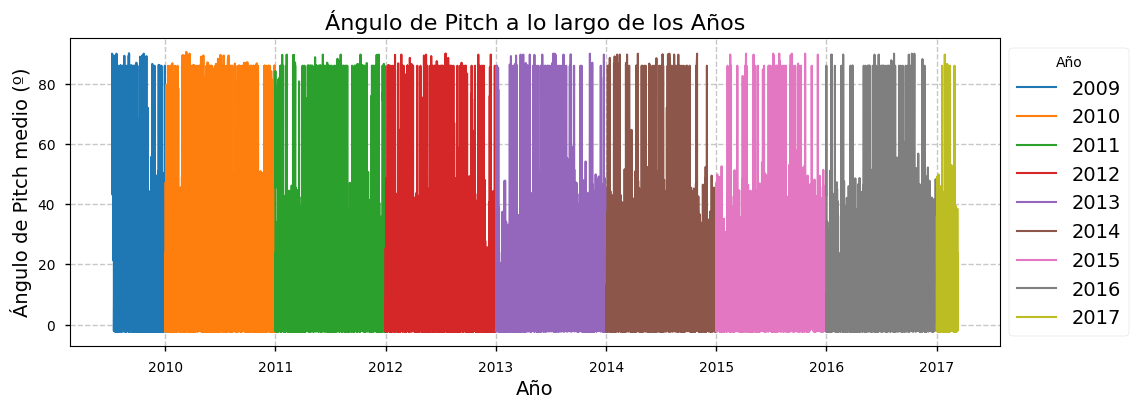

In [ ]:
# ================================================================
# =============== Gráfica Ángulo de Pitch En cada año ============
# ================================================================

df['TTimeStamp'] = pd.to_datetime(df['TTimeStamp'])
df['año'] = df['TTimeStamp'].dt.year

plt.figure(figsize=(12, 4))

for año, datos_año in df.groupby('año'):
    plt.plot(datos_año['TTimeStamp'], datos_año['Blds_PitchAngle_Avg'], label=str(año))

# Personalizacion
plt.xlabel('Año', fontsize = 14)
plt.ylabel('Ángulo de Pitch medio (º)', fontsize = 14)
plt.title('Ángulo de Pitch a lo largo de los Años', fontsize = 16)
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('AnualPitchAngleAvg.pdf',bbox_inches = 'tight')

# Mostrar
plt.show()

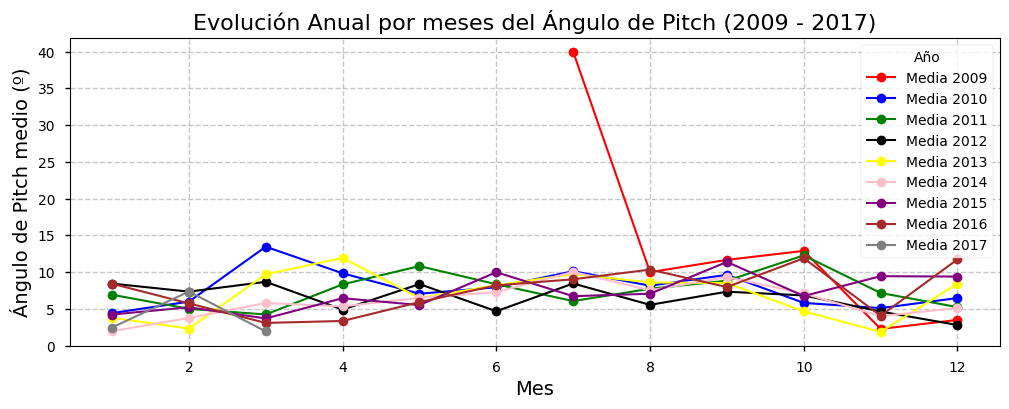

In [ ]:
# ================================================================
# ========= Gráfica Blds_PitchAngle_Avg Media Durante los meses ==
# ================================================================

df['mes'] = df['TTimeStamp'].dt.month

# la media mensual para cada año
medias_2009 = df[df['año'] == 2009].groupby('mes')['Blds_PitchAngle_Avg'].mean()
medias_2010 = df[df['año'] == 2010].groupby('mes')['Blds_PitchAngle_Avg'].mean()
medias_2011 = df[df['año'] == 2011].groupby('mes')['Blds_PitchAngle_Avg'].mean()
medias_2012 = df[df['año'] == 2012].groupby('mes')['Blds_PitchAngle_Avg'].mean()
medias_2013 = df[df['año'] == 2013].groupby('mes')['Blds_PitchAngle_Avg'].mean()
medias_2014 = df[df['año'] == 2014].groupby('mes')['Blds_PitchAngle_Avg'].mean()
medias_2015 = df[df['año'] == 2015].groupby('mes')['Blds_PitchAngle_Avg'].mean()
medias_2016 = df[df['año'] == 2016].groupby('mes')['Blds_PitchAngle_Avg'].mean()
medias_2017 = df[df['año'] == 2017].groupby('mes')['Blds_PitchAngle_Avg'].mean()


# Gráfico
plt.figure(figsize=(12, 4))

plt.plot(medias_2009.index, medias_2009, label='Media 2009', color='red', marker='o')
plt.plot(medias_2010.index, medias_2010, label='Media 2010', color='blue', marker='o')
plt.plot(medias_2011.index, medias_2011, label='Media 2011', color='green', marker='o')
plt.plot(medias_2012.index, medias_2012, label='Media 2012', color='black', marker='o')
plt.plot(medias_2013.index, medias_2013, label='Media 2013', color='yellow', marker='o')
plt.plot(medias_2014.index, medias_2014, label='Media 2014', color='pink', marker='o')
plt.plot(medias_2015.index, medias_2015, label='Media 2015', color='purple', marker='o')
plt.plot(medias_2016.index, medias_2016, label='Media 2016', color='brown', marker='o')
plt.plot(medias_2017.index, medias_2017, label='Media 2017', color='gray', marker='o')

# Personalizacion
plt.xlabel('Mes', fontsize = 14)
plt.ylabel('Ángulo de Pitch medio (º)', fontsize = 14)
plt.title('Evolución Anual por meses del Ángulo de Pitch (2009 - 2017)', fontsize = 16)
plt.legend(title='Año', fontsize = 10)
plt.grid(True, linestyle='--', alpha=0.7)
# plt.grid(False)
plt.savefig('MonthsPitchAngleAvg.pdf',bbox_inches = 'tight')
# Mostrar
plt.show()

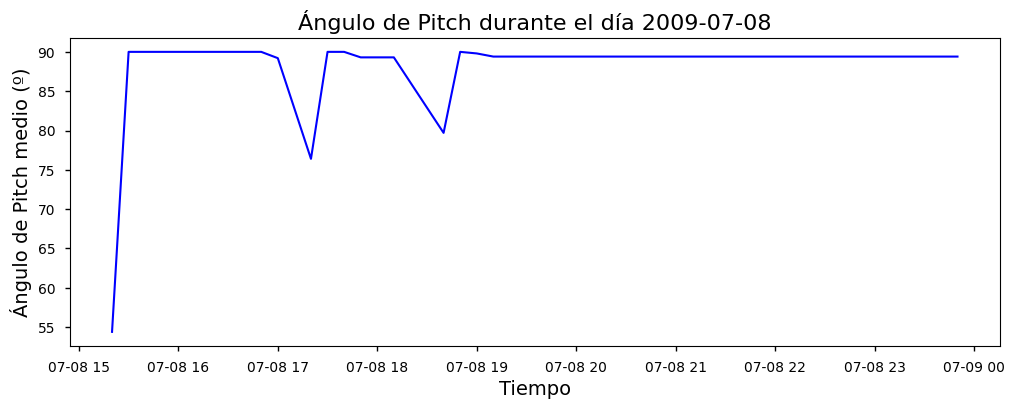

In [ ]:
# ================================================================
# ======= Gráfica Ángulo de Pitch en un día ======================
# ================================================================

fecha_deseada = df['TTimeStamp'].dt.date.iloc[0]
datos_dia = df[df['TTimeStamp'].dt.date == fecha_deseada]

plt.figure(figsize=(12, 4))

colores = datos_dia['Blds_PitchAngle_Avg']
plt.plot(datos_dia['TTimeStamp'], datos_dia['Blds_PitchAngle_Avg'], linestyle='-', color='blue')
plt.rcParams['axes.edgecolor'] = 'black'  # Color de borde negro

plt.xlabel('Tiempo', fontsize = 14)
plt.ylabel('Ángulo de Pitch medio (º)', fontsize = 14)
plt.title(f'Ángulo de Pitch durante el día {fecha_deseada}', fontsize = 16)
plt.savefig('DayPitchAngleAvg.pdf',bbox_inches = 'tight')
plt.show()

### **POTENCIA GENERADA**

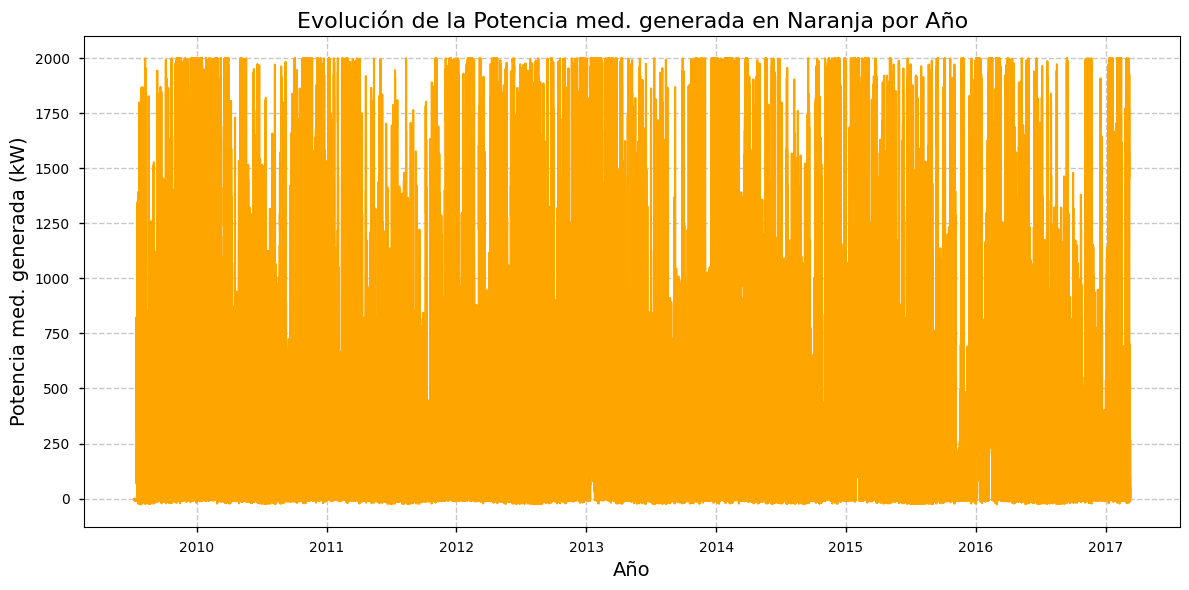

In [ ]:
# ================================================================
# Gráfica Potencia media desde 2009 - 2017
# ================================================================
# 'TTimeStamp' sea del tipo datetime
df['TTimeStamp'] = pd.to_datetime(df['TTimeStamp'])

df['año'] = df['TTimeStamp'].dt.year

plt.figure(figsize=(12, 6))
plt.plot(df['TTimeStamp'], df["Grd_Prod_Pwr_Avg"], color='orange', linewidth=1.5)

plt.xlabel('Año', fontsize = 14)
plt.ylabel('Potencia med. generada (kW)', fontsize = 14)
plt.title('Evolución de la Potencia med. generada en Naranja por Año', fontsize = 16)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('TotalAvgPowerAvg.pdf',bbox_inches = 'tight')

plt.show()

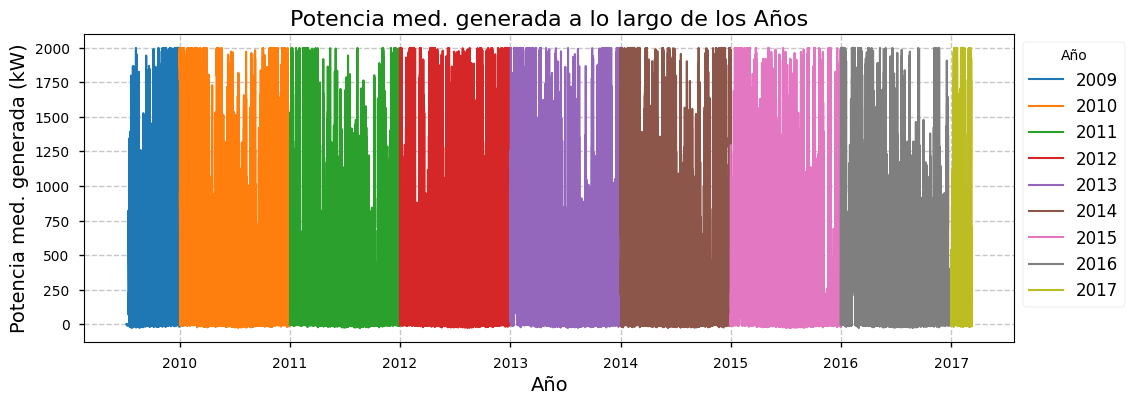

In [ ]:
# ================================================================
# ========= Gráfica Potencia media generada En cada año ==========
# ================================================================

df['TTimeStamp'] = pd.to_datetime(df['TTimeStamp'])
df['año'] = df['TTimeStamp'].dt.year

plt.figure(figsize=(12, 4))

for año, datos_año in df.groupby('año'):
    plt.plot(datos_año['TTimeStamp'], datos_año['Grd_Prod_Pwr_Avg'], label=str(año))

# Personalizacion
plt.xlabel('Año', fontsize = 14)
plt.ylabel('Potencia med. generada (kW)', fontsize = 14)
plt.title('Potencia med. generada a lo largo de los Años', fontsize = 16)
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('AnualAvgPowerAvg.pdf',bbox_inches = 'tight')

# Mostrar
plt.show()

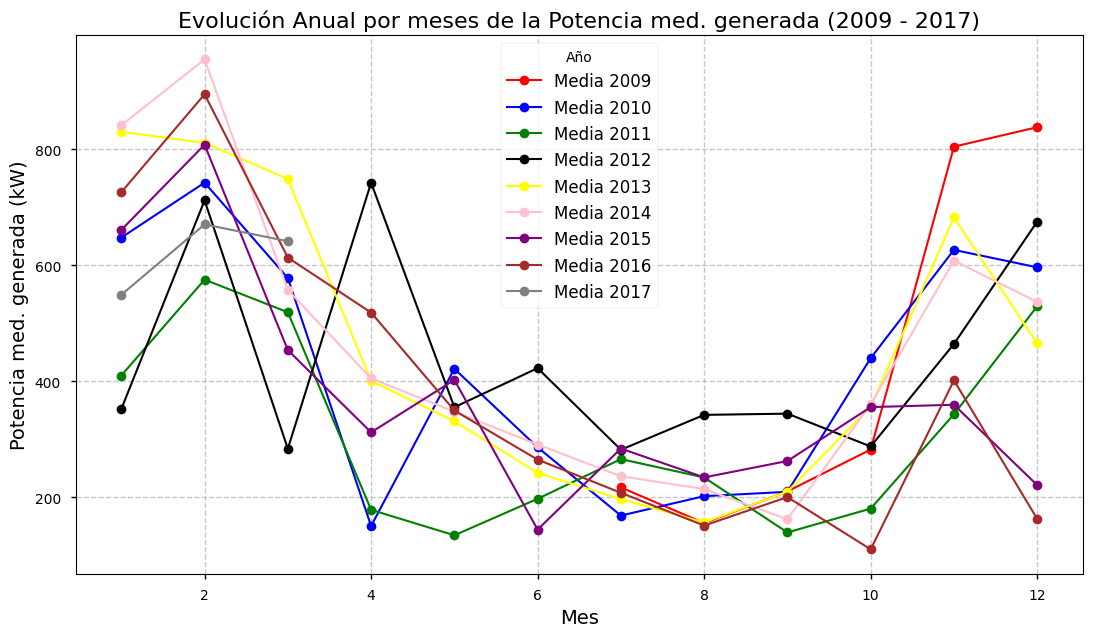

In [ ]:
# ================================================================
# =============== Gráfica Potencia Media Durante los meses =========
# ================================================================

df['mes'] = df['TTimeStamp'].dt.month

# la media mensual para cada año
medias_2009 = df[df['año'] == 2009].groupby('mes')['Grd_Prod_Pwr_Avg'].mean()
medias_2010 = df[df['año'] == 2010].groupby('mes')['Grd_Prod_Pwr_Avg'].mean()
medias_2011 = df[df['año'] == 2011].groupby('mes')['Grd_Prod_Pwr_Avg'].mean()
medias_2012 = df[df['año'] == 2012].groupby('mes')['Grd_Prod_Pwr_Avg'].mean()
medias_2013 = df[df['año'] == 2013].groupby('mes')['Grd_Prod_Pwr_Avg'].mean()
medias_2014 = df[df['año'] == 2014].groupby('mes')['Grd_Prod_Pwr_Avg'].mean()
medias_2015 = df[df['año'] == 2015].groupby('mes')['Grd_Prod_Pwr_Avg'].mean()
medias_2016 = df[df['año'] == 2016].groupby('mes')['Grd_Prod_Pwr_Avg'].mean()
medias_2017 = df[df['año'] == 2017].groupby('mes')['Grd_Prod_Pwr_Avg'].mean()


# Gráfico
plt.figure(figsize=(13, 7))

plt.plot(medias_2009.index, medias_2009, label='Media 2009', color='red', marker='o')
plt.plot(medias_2010.index, medias_2010, label='Media 2010', color='blue', marker='o')
plt.plot(medias_2011.index, medias_2011, label='Media 2011', color='green', marker='o')
plt.plot(medias_2012.index, medias_2012, label='Media 2012', color='black', marker='o')
plt.plot(medias_2013.index, medias_2013, label='Media 2013', color='yellow', marker='o')
plt.plot(medias_2014.index, medias_2014, label='Media 2014', color='pink', marker='o')
plt.plot(medias_2015.index, medias_2015, label='Media 2015', color='purple', marker='o')
plt.plot(medias_2016.index, medias_2016, label='Media 2016', color='brown', marker='o')
plt.plot(medias_2017.index, medias_2017, label='Media 2017', color='gray', marker='o')

# Personalizacion
plt.xlabel('Mes', fontsize = 14)
plt.ylabel('Potencia med. generada (kW)', fontsize = 14)
plt.title('Evolución Anual por meses de la Potencia med. generada (2009 - 2017)', fontsize = 16)
plt.legend(title='Año', fontsize = 12)
plt.grid(True, linestyle='--', alpha=0.7)
# plt.grid(False)
# Mostrar
plt.savefig('MonthsAvgPowerAvg.pdf',bbox_inches = 'tight')
plt.show()

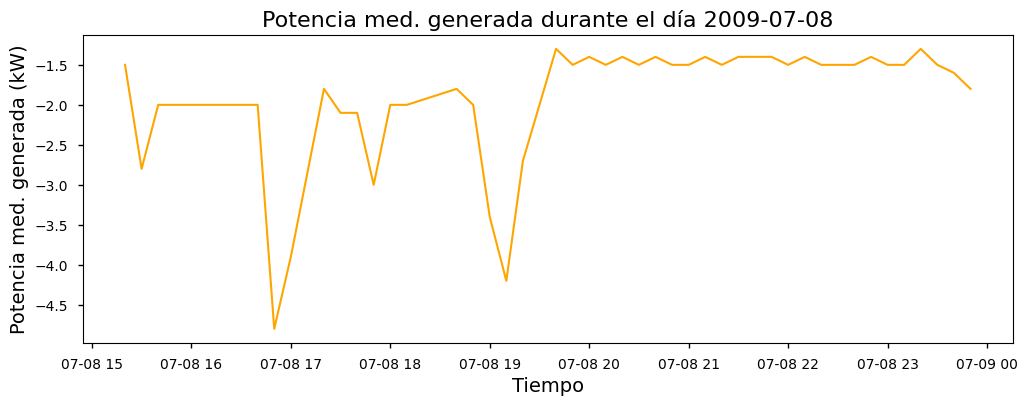

In [ ]:
# ================================================================
# ========== Gráfica Potencia media generada en un día ===========
# ================================================================

# un solo día: el primer día del dataset
fecha_deseada = df['TTimeStamp'].dt.date.iloc[0]
datos_dia = df[df['TTimeStamp'].dt.date == fecha_deseada]

plt.figure(figsize=(12, 4))

colores = datos_dia['Grd_Prod_Pwr_Avg']
plt.plot(datos_dia['TTimeStamp'], datos_dia['Grd_Prod_Pwr_Avg'], linestyle='-', color='orange')
plt.rcParams['axes.edgecolor'] = 'black'  # Color de borde negro

plt.xlabel('Tiempo', fontsize = 14)
plt.ylabel('Potencia med. generada (kW)', fontsize = 14)
plt.title(f'Potencia med. generada durante el día {fecha_deseada}', fontsize = 16)
plt.savefig('DayAvgPowerAvg.pdf',bbox_inches = 'tight')
plt.show()

#### **Scatter Potencias y matriz de correlacion**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Procesamiento de datos ###
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from pandas.plotting import scatter_matrix

### Visualización ###
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

<ipython-input-42-f496ed623a93>:10: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [ ]:
# Especifica la ruta del archivo CSV
file_path = '/content/drive/MyDrive/Universidad/TFG/Material/Scrips Visualization/Anemoi_WT1.csv'

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path, parse_dates=True)
df.pop("Unnamed: 0")
df

,Id,TTimeStamp,Amb_WindSpeed_Avg,Grd_Prod_Pwr_Avg,Blds_PitchAngle_Avg,Grd_Prod_Pwr_Max,Grd_Prod_Pwr_Min
0,1,2009-07-08 15:20:00,0.4,-1.5,54.4,0.0,-2.1
1,1,2009-07-08 15:30:00,0.4,-2.8,90.0,-2.0,-3.8
2,1,2009-07-08 15:40:00,0.4,-2.0,90.0,-2.0,-2.1
3,1,2009-07-08 15:50:00,0.4,-2.0,90.0,-2.0,-2.1
4,1,2009-07-08 16:00:00,0.4,-2.0,90.0,-2.0,-2.1
...,...,...,...,...,...,...,...
399010,1,2017-03-10 14:20:00,5.1,205.2,-1.1,669.3,-17.3
399011,1,2017-03-10 14:30:00,4.9,180.8,-0.9,419.0,-16.8
399012,1,2017-03-10 14:40:00,4.4,101.7,-0.2,288.7,-28.1
399013,1,2017-03-10 14:50:00,5.4,265.7,-1.2,644.3,-21.5


In [ ]:
# POSIBLE CONTINUACIÓN: POTENCIA MEDIA GENERADA EN RELACION A LA VELOCIDAD DEL VIENTO O ANGULO DE PITCH, O AMBAS CON UNA GRAFICA 3D y CORRELACION VARIABLES
curvas = df.copy()
curvas.columns=['Id', 'TTimeStamp','Velocidad med. del viento (m/s)', 'Potencia med. producida (kW)', 'Angulo de pitch med. (°)','Potencia máx. producida (kW)','Potencia mín. producida (kW)']

In [ ]:
# ================================================================
# ========== Gráfica Potencia/Angulo de Pitch ====================
# ================================================================
fig = px.scatter(curvas, x='Angulo de pitch med. (°)', y='Potencia med. producida (kW)', color='Potencia med. producida (kW)', title='Potencia Total Producida por Ángulo de Pitch')

fig.update_layout(
    xaxis_title="Ángulo de pitch med. (°)",
    yaxis_title="Potencia med. producida (kW)",
    width=900,
    height=600,
     font=dict(
        size=14,
    )
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ================================================================
# ========== Gráfica Potencia/Viento comportamiento ==============
# ================================================================
fig = px.scatter(curvas, x='Velocidad med. del viento (m/s)', y="Potencia med. producida (kW)",color="Potencia med. producida (kW)",
                 title="Potencia media Producida por Velocidad del Viento")
fig.update_layout(
    xaxis_title="Velocidad med. del viento (m/s)",
    yaxis_title="Potencia med. producida (kW)",
    width=900,
    height=600,
     font=dict(
        size=14,
    )
)
# showing the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ================================================================
# ========== Gráfica Potencia/Viento comportamiento ==============
# ================================================================
fig = px.scatter(curvas, x='Velocidad med. del viento (m/s)', y="Potencia máx. producida (kW)",color="Potencia máx. producida (kW)",
                 title="Potencia máxima producida por Velocidad del Viento")
fig.update_layout(
    xaxis_title="Velocidad med. del viento (m/s)",
    yaxis_title="Potencia máx. producida (kW)",
    width=900,
    height=600,
     font=dict(
        size=14,
    )
)
# showing the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ================================================================
# ========== Gráfica Potencia/Viento comportamiento ==============
# ================================================================
fig = px.scatter(curvas, x='Velocidad med. del viento (m/s)', y="Potencia mín. producida (kW)",color="Potencia mín. producida (kW)",
                 title="Potencia mínima producida por Velocidad del Viento")
fig.update_layout(
    xaxis_title="Velocidad med. del viento (m/s)",
    yaxis_title="Potencia mín. producida (kW)",
    width=900,
    height=600,
     font=dict(
        size=14,
    )
)
# showing the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

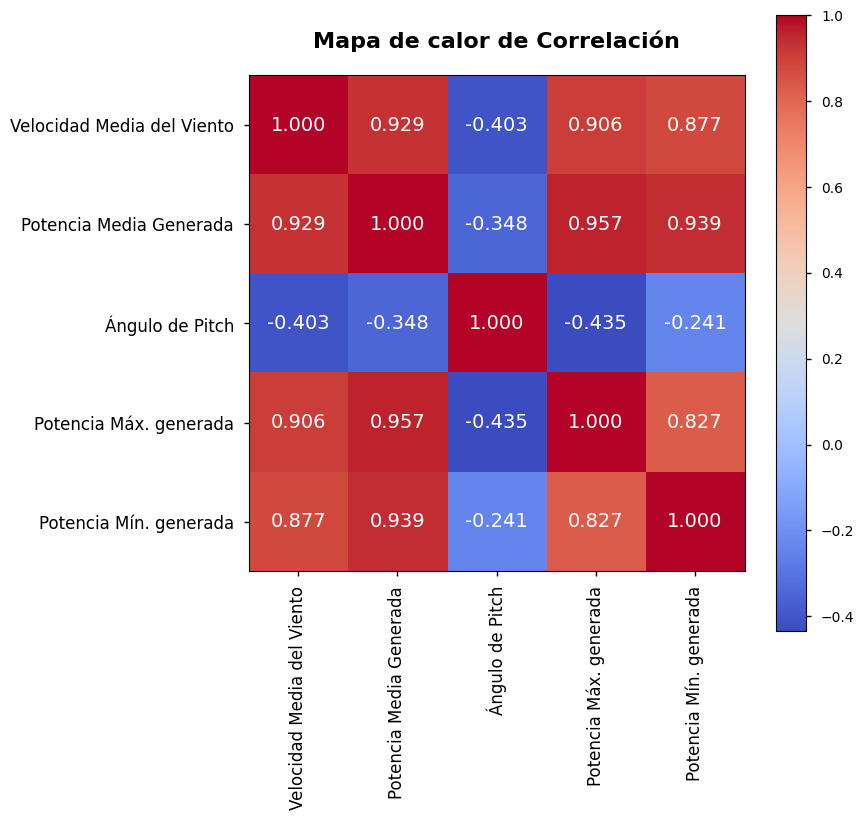

In [ ]:
# ================================================================
# =================== CORRELATION HEATMAP ========================
# ================================================================
nuevo_df = df[['Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', 'Blds_PitchAngle_Avg', 'Grd_Prod_Pwr_Max', 'Grd_Prod_Pwr_Min']].copy()
corr = nuevo_df.corr()
plt.imshow(corr, cmap='coolwarm')

plt.colorbar()
plt.gcf().set_size_inches(8, 8)

ticks = ['Velocidad Media del Viento', 'Potencia Media Generada', 'Ángulo de Pitch', 'Potencia Máx. generada', 'Potencia Mín. generada']
plt.xticks(range(len(corr.columns)), ticks, fontsize=12, rotation=90)
plt.yticks(range(len(corr.columns)), ticks, fontsize=12)
plt.title('Mapa de calor de Correlación', fontsize=16, pad=20, fontweight='bold')

labels = corr.values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.3f}'.format(labels[b, a]), ha='center', va='center', color='white', fontsize=14)

plt.savefig('CorrelationHeatMap.pdf',bbox_inches = 'tight')


In [ ]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#df_sampled = df.sample(n=1000)
#if 'TTimeStamp' not in df_sampled.columns:
#    df_sampled.reset_index(inplace=True)

#df_sampled.set_index('TTimeStamp', inplace=True)
#plt.figure(figsize=(10, 6))
#sns.heatmap(df_sampled.T, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
#plt.title('Mapa de Calor Temporal')
#plt.xlabel('Fecha')
#plt.ylabel('Variables')
#plt.show()

In [ ]:
# ================================================================
# ========================= Gráfica 3D ===========================
# ================================================================
fig = px.scatter_3d(curvas, x='Velocidad med. del viento (m/s)', y='Angulo de pitch med. (°)', z="Potencia med. producida (kW)", color="Potencia med. producida (kW)",
                    title="Potencia media Producida por Velocidad del Viento")

fig.update_layout(
    width=900,  # Ajusta el ancho del gráfico según tus necesidades
    height=600  # Ajusta la altura del gráfico según tus necesidades
)

# Mostrar el gráfico
fig.show()

Output hidden; open in https://colab.research.google.com to view.